In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 设置绘图风格
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("muted")

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

# 加载数据集
train_df = pd.read_csv('train.csv')  # 请替换为实际路径
test_df = pd.read_csv('test.csv')    # 请替换为实际路径
train_df.replace('-', np.nan, inplace=True)
test_df.replace('-', np.nan, inplace=True)
train_df['Mileage'] = train_df['Mileage'].astype(str).str.replace(' km', '').str.strip()
train_df['Mileage'] = pd.to_numeric(train_df['Mileage'], errors='coerce')
test_df['Mileage'] = test_df['Mileage'].astype(str).str.replace(' km', '').str.strip()
test_df['Mileage'] = pd.to_numeric(test_df['Mileage'], errors='coerce')

# 显示数据集基本信息
print("训练集前5行：")
display(train_df.head())
print("\n训练集信息：")
train_df.info()

训练集前5行：


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4



训练集信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null

In [3]:
print("\n训练集缺失值统计：")
display(train_df.isnull().sum())


训练集缺失值统计：


ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

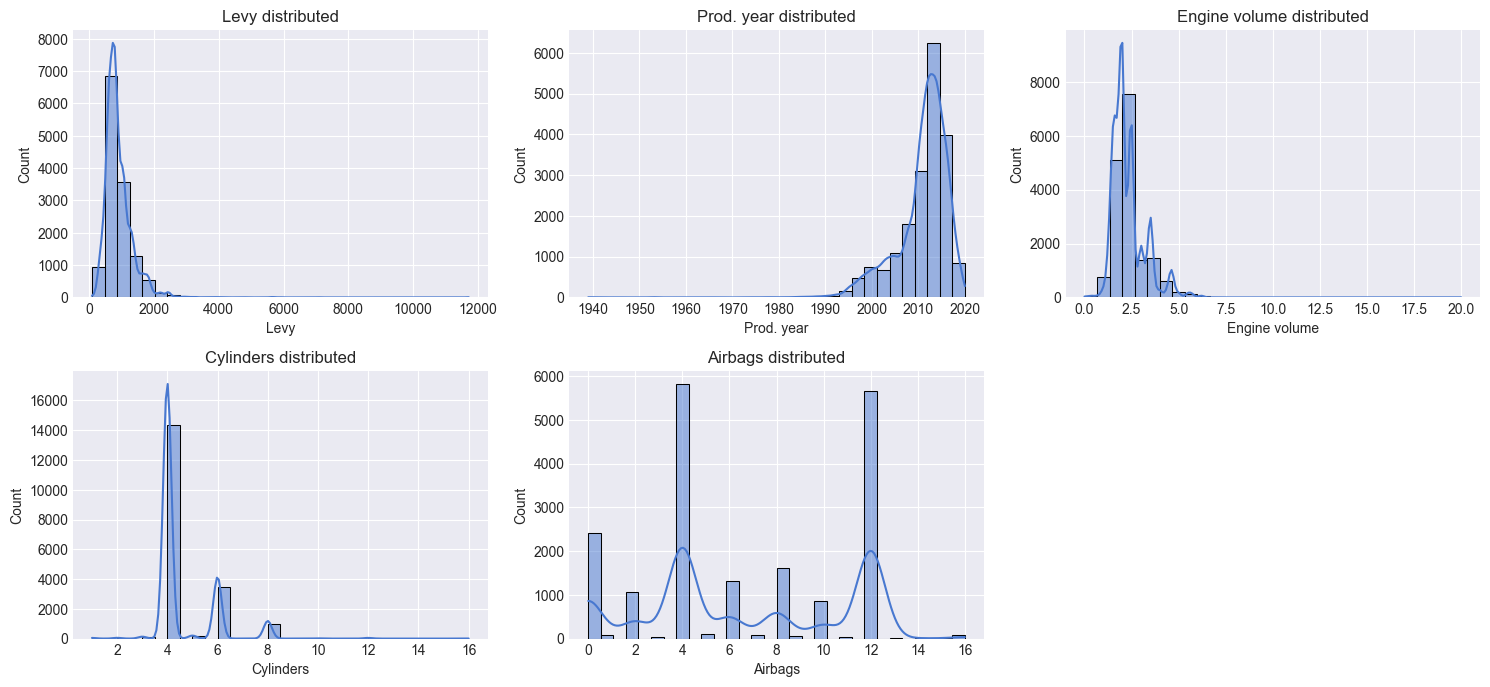

In [4]:
numerical_cols = ['Levy', 'Prod. year', 'Engine volume',  'Cylinders', 'Airbags']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    # 转换为浮点型，确保绘图正常
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    sns.histplot(train_df[col].dropna(), bins=30, kde=True)
    plt.title(f'{col} distributed')
plt.tight_layout()
plt.show()

In [5]:
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 
                    'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

for col in categorical_cols:
    # 先将列转换为字符串类型，然后再处理
    train_df[col] = train_df[col].astype(str).str.strip().str.lower()
    print(f"{col} 的唯一值数量: {train_df[col].nunique()}")

Manufacturer 的唯一值数量: 65
Model 的唯一值数量: 1511
Category 的唯一值数量: 11
Leather interior 的唯一值数量: 2
Fuel type 的唯一值数量: 7
Gear box type 的唯一值数量: 4
Drive wheels 的唯一值数量: 3
Doors 的唯一值数量: 3
Wheel 的唯一值数量: 2
Color 的唯一值数量: 16


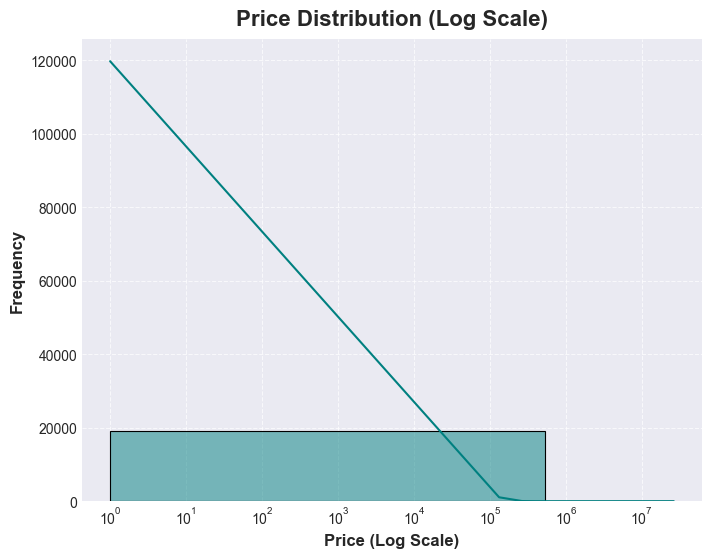

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Price'].dropna(), bins=50, kde=True, color='teal', edgecolor='black')

# 设置 X轴为对数刻度
plt.xscale('log')

# 自定义标题和轴标签
plt.title('Price Distribution (Log Scale)', fontsize=16, weight='bold', pad=10)
plt.xlabel('Price (Log Scale)', fontsize=12, weight='semibold')
plt.ylabel('Frequency', fontsize=12, weight='semibold')

# 添加网格和优化边框
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

# 显示图像
plt.show()

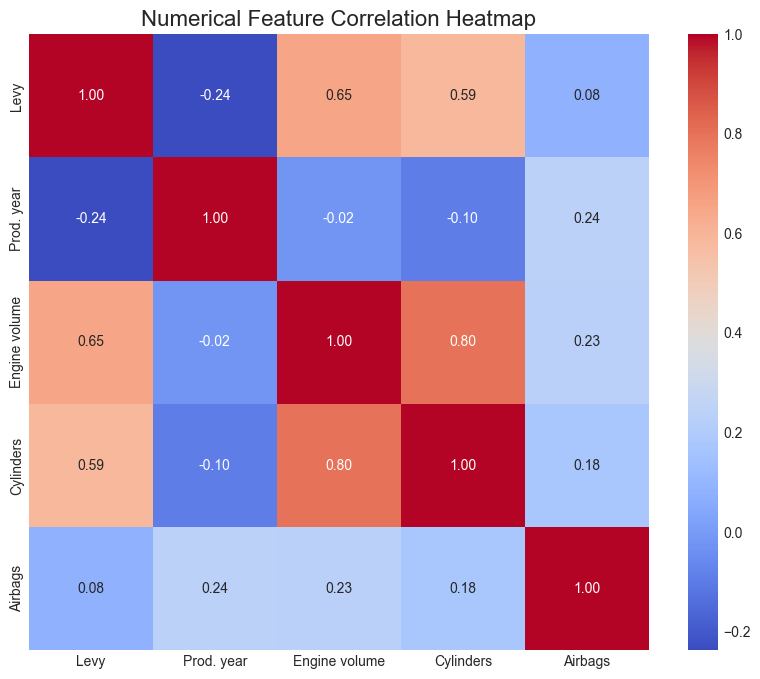

In [7]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Numerical Feature Correlation Heatmap', fontsize=16)
plt.show()

In [8]:
#缺失值处理
for col in numerical_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')  # 确保数值型
    train_df[col].fillna(train_df[col].median(), inplace=True)
for col in categorical_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

In [9]:
#移除价格的异常值域 
q1, q3 = train_df['Price'].quantile([0.25, 0.75])
iqr = q3 - q1
train_df = train_df[(train_df['Price'] >= q1 - 1.5 * iqr) & (train_df['Price'] <= q3 + 1.5 * iqr)]

In [10]:
print(train_df['Price'].describe())  # 查看统计信息（如最小值、最大值、均值）
print(train_df['Price'].head(20))   # 查看前20个值，确认是否有异常

count    18164.000000
mean     14024.917860
std      11377.779677
min          1.000000
25%       4861.000000
50%      12231.000000
75%      20071.000000
max      47120.000000
Name: Price, dtype: float64
0     13328
1     16621
2      8467
3      3607
4     11726
5     39493
6      1803
7       549
8      1098
9     26657
10      941
11     8781
12     3000
13     1019
15      549
16     7683
17    28382
18      549
19      941
20    18826
Name: Price, dtype: int64


In [11]:


label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    label_encoders[col] = le
    # 可选：打印部分编码映射，以便验证
    unique_values = le.classes_[:5]  # 只显示前5个
    encoded_values = le.transform(unique_values)
    print(f"Column {col} encoding example:")
    for orig, enc in zip(unique_values, encoded_values):
        print(f"  {orig} -> {enc}")

# 特征缩放
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
print(f"Scaler 拟合的特征: {scaler.feature_names_in_}")  # 调试：检查 scaler 拟合的特征
#print(f"数值特征缩放后样本 (前5行): \n{X[numerical_cols].head()}")
X = train_df.drop(['ID', 'Price'], axis=1)
y = train_df['Price']
print(f"训练特征列: {X.columns.tolist()}")  # 调试：检查 X 的列名
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train[0:5])

Column Manufacturer encoding example:
  acura -> 0
  alfa romeo -> 1
  audi -> 2
  bmw -> 3
  buick -> 4
Column Model encoding example:
  09-mar -> 0
  100 -> 1
  100 nx -> 2
  1000 -> 3
  1111 -> 4
Column Category encoding example:
  cabriolet -> 0
  coupe -> 1
  goods wagon -> 2
  hatchback -> 3
  jeep -> 4
Column Leather interior encoding example:
  no -> 0
  yes -> 1
Column Fuel type encoding example:
  cng -> 0
  diesel -> 1
  hybrid -> 2
  hydrogen -> 3
  lpg -> 4
Column Gear box type encoding example:
  automatic -> 0
  manual -> 1
  tiptronic -> 2
  variator -> 3
Column Drive wheels encoding example:
  4x4 -> 0
  front -> 1
  rear -> 2
Column Doors encoding example:
  02-mar -> 0
  04-may -> 1
  >5 -> 2
Column Wheel encoding example:
  left wheel -> 0
  right-hand drive -> 1
Column Color encoding example:
  beige -> 0
  black -> 1
  blue -> 2
  brown -> 3
  carnelian red -> 4
Scaler 拟合的特征: ['Levy' 'Prod. year' 'Engine volume' 'Cylinders' 'Airbags']
训练特征列: ['Levy', 'Manufacturer

In [12]:
print(f"训练集大小: {X_train.shape}, 验证集大小: {X_val.shape}, 测试集大小: {X_val.shape}")

训练集大小: (12714, 16), 验证集大小: (5450, 16), 测试集大小: (5450, 16)


In [13]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# 预测与评估
y_val_pred = baseline_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"验证集均方误差 (MSE): {val_mse:.2f}")
print(f"验证集 R² 分数: {val_r2:.2f}")

验证集均方误差 (MSE): 108041580.04
验证集 R² 分数: 0.16


In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor  # 新增导入

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=42),
    #'Support Vector Regression': SVR(kernel='rbf'),
    #'XGBoost': XGBRegressor(n_estimators=10, random_state=42)  # 新增模型
}

# 存储模型结果（以下保持原样不变）
results = {'Model': [], 'MSE (Validation)': [], 'R² (Validation)': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    results['Model'].append(name)
    results['MSE (Validation)'].append(val_mse)
    results['R² (Validation)'].append(val_r2)

    print(f"{name} - 验证集 MSE: {val_mse:.2f}, R²: {val_r2:.2f}")

results_df = pd.DataFrame(results)

Linear Regression - 验证集 MSE: 108041580.04, R²: 0.16
Random Forest - 验证集 MSE: 34613805.24, R²: 0.73
Gradient Boosting - 验证集 MSE: 86948120.51, R²: 0.32



模型对比结果：


,Model,MSE (Validation),R² (Validation)
0,Linear Regression,1.080416e+08,0.157030
1,Random Forest,3.461381e+07,0.729934
2,Gradient Boosting,8.694812e+07,0.321607


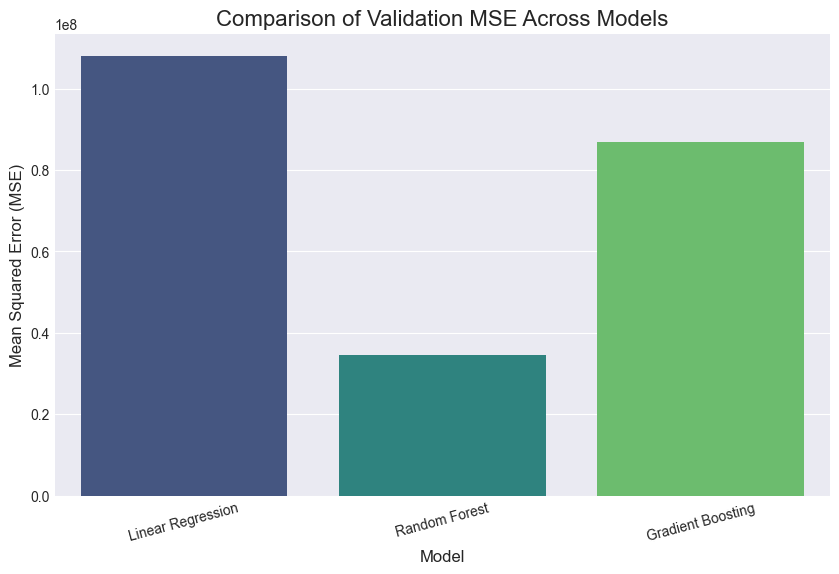

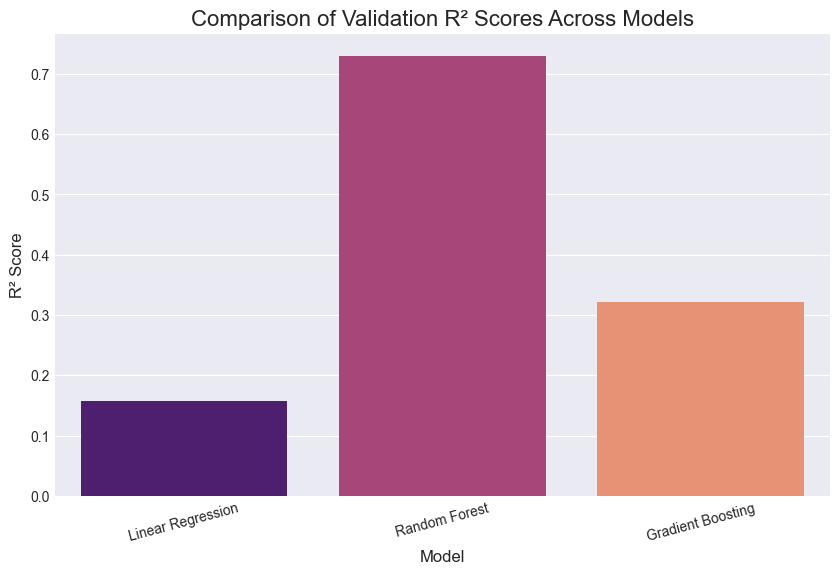

In [15]:
print("\n模型对比结果：")
display(results_df)

# MSE对比图表（修改标题和标签）
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE (Validation)', data=results_df, palette='viridis')
plt.title('Comparison of Validation MSE Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(rotation=15)
plt.show()

# R²对比图表（修改标题和标签）
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R² (Validation)', data=results_df, palette='magma')
plt.title('Comparison of Validation R² Scores Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(rotation=15)
plt.show()

根据R^2和mse的标准 我们在未经参数优化下的最佳模型选择是random forest(随机森林)

# 随机森林在汽车价格预测中的优势

## 非线性关系捕捉
汽车价格与特征（如 **Mileage**、**Engine volume**、**Horsepower** 等）之间的关系往往是**非线性**的。线性回归假设特征与目标变量之间是线性关系，而随机森林通过构建多个决策树，可以捕捉复杂的非线性模式。

## 鲁棒性强
随机森林是一个**集成方法**，通过平均多棵树的预测结果，减少了过拟合的风险。对比单棵决策树，它对噪声和异常值（如 **Price** 或 **Mileage** 中的极值）更鲁棒。

## 特征重要性
随机森林天然支持**特征重要性分析**，可以帮助理解哪些变量（如 **Engine volume** 或 **Manufacturer**）对价格预测贡献最大。这对解释模型很有帮助。

## 适应高维数据
数据集有多个特征（数值型和类别型，经过编码后维度更高），随机森林能有效处理高维数据，而像 **SVR** 可能对特征数量敏感，需要更多调参。

## 对比其他模型
| 模型 | 优缺点 |
|------|--------|
| **线性回归** | 过于简单，无法捕捉非线性关系，R² 通常较低 |
| **梯度提升** | 对超参数更敏感，未经调优时不如随机森林 |
| **SVR** | 对数据缩放和核函数选择敏感，小数据集表现好，但大规模数据可能需要更复杂的调参 |

In [16]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ======================================================================
# 优化配置的网格搜索，解决验证集效果差的问题
# ======================================================================

print("\n" + "="*80)
print("开始随机森林模型的分阶段网格搜索与改进")
print("="*80)

# 初始随机森林配置
rf_base = RandomForestRegressor(n_estimators=10,random_state=42)

# 为了解决验证集效果差的问题，我们需要采取以下措施：
# 1. 使用分层次的网格搜索以节省时间
# 2. 增加正则化相关参数的搜索
# 3. 添加学习曲线分析以检测过拟合
# 4. 实现特征重要性筛选

# -------------- 第1阶段: 评估基线模型 --------------
print("\n===== 第1阶段: 基线模型评估 =====")
# 首先评估默认参数的效果
start_time = time.time()
print("训练默认参数的随机森林...")

rf_base.fit(X_train, y_train)
train_score = rf_base.score(X_train, y_train)
val_score = rf_base.score(X_val, y_val)

print(f"基线模型 - 训练集 R²: {train_score:.4f}, 验证集 R²: {val_score:.4f}")
print(f"训练集与验证集 R² 差异: {train_score - val_score:.4f}")

# 检查是否存在过拟合
if train_score - val_score > 0.1:
    print("\n⚠️ 检测到明显的过拟合问题! 将调整搜索策略以增强正则化。")
    overfitting = True
else:
    print("\n模型似乎没有严重过拟合，将进行常规参数搜索。")
    overfitting = False

# -------------- 第2阶段: 关注树的复杂度参数 --------------
print("\n===== 第2阶段: 树的复杂度参数调优 =====")

# 根据过拟合情况调整搜索范围
if overfitting:
    # 如果存在过拟合，我们更关注限制树的深度和增加最小样本数
    complexity_params = {
        'max_depth': [4, 6, 8, 10, None],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [2, 4, 8]
    }
    print("由于检测到过拟合，搜索更多限制性的树复杂度参数...")
else:
    # 常规搜索范围
    complexity_params = {
        'max_depth': [8, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

# 使用3折交叉验证节省时间
complexity_cv = GridSearchCV(
    RandomForestRegressor(n_estimators=100, random_state=42),
    complexity_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\n搜索最佳树复杂度参数...")
with tqdm(total=1) as pbar:
    complexity_cv.fit(X_train, y_train)
    pbar.update(1)

best_complexity = complexity_cv.best_params_
best_complexity_score = complexity_cv.best_score_

print(f"\n最佳树复杂度参数: {best_complexity}")
print(f"交叉验证 R² 分数: {best_complexity_score:.4f}")

# -------------- 第3阶段: 调整森林大小和随机性 --------------
print("\n===== 第3阶段: 森林大小和随机性调优 =====")

# 构建森林参数网格
forest_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2', None]
}

# 保持最佳树复杂度参数
best_rf = RandomForestRegressor(
    max_depth=best_complexity['max_depth'],
    min_samples_split=best_complexity['min_samples_split'],
    min_samples_leaf=best_complexity['min_samples_leaf'],
    random_state=42
)

# 使用完整5折交叉验证
forest_cv = GridSearchCV(
    best_rf,
    forest_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\n搜索最佳森林参数...")
with tqdm(total=1) as pbar:
    forest_cv.fit(X_train, y_train)
    pbar.update(1)

best_forest = forest_cv.best_params_
best_forest_score = forest_cv.best_score_

print(f"\n最佳森林参数: {best_forest}")
print(f"交叉验证 R² 分数: {best_forest_score:.4f}")

# -------------- 第4阶段: 整合最佳参数并添加额外正则化 --------------
print("\n===== 第4阶段: 整合参数并添加正则化 =====")

# 特别针对验证集效果差的问题，添加bootstrap和oob_score的变化
if overfitting:
    print("由于存在过拟合，增加额外正则化参数搜索...")
    final_params = {
        'bootstrap': [True, False],
        'oob_score': [True, False],
        'ccp_alpha': [0.0, 0.001, 0.01]  # 成本复杂度剪枝参数
    }
else:
    final_params = {
        'bootstrap': [True, False],
        'oob_score': [True, False]
    }

# 整合之前找到的最佳参数
final_rf = RandomForestRegressor(
    n_estimators=best_forest['n_estimators'],
    max_features=best_forest['max_features'],
    max_depth=best_complexity['max_depth'],
    min_samples_split=best_complexity['min_samples_split'],
    min_samples_leaf=best_complexity['min_samples_leaf'],
    random_state=42
)

# 最终的网格搜索
final_cv = GridSearchCV(
    final_rf,
    final_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("\n执行最终参数搜索...")
with tqdm(total=1) as pbar:
    final_cv.fit(X_train, y_train)
    pbar.update(1)

best_final = final_cv.best_params_
best_final_score = final_cv.best_score_

print(f"\n最终最佳参数: {best_final}")
print(f"交叉验证 R² 分数: {best_final_score:.4f}")

# -------------- 第5阶段: 特征重要性分析与筛选 --------------
print("\n===== 第5阶段: 特征重要性分析与筛选 =====")

# 合并所有最佳参数
all_best_params = {
    'n_estimators': best_forest['n_estimators'],
    'max_features': best_forest['max_features'],
    'max_depth': best_complexity['max_depth'],
    'min_samples_split': best_complexity['min_samples_split'],
    'min_samples_leaf': best_complexity['min_samples_leaf'],
    **best_final
}

print(f"\n合并后的最佳参数: {all_best_params}")

# 训练带有所有最佳参数的模型
best_model = RandomForestRegressor(**all_best_params, random_state=42)
best_model.fit(X_train, y_train)

# 计算特征重要性
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 获取特征名称
try:
    feature_names = X_train.columns
except:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

# 打印特征重要性
print("\n特征重要性排名:")
for i, idx in enumerate(indices[:10]):  # 只显示前10个
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")

# 尝试特征选择以改善验证集性能
print("\n尝试基于特征重要性的特征选择以改善验证集性能...")

# 选择重要性大于平均值的特征
importance_threshold = np.mean(importances)
selected_indices = np.where(importances > importance_threshold)[0]
print(f"选择了 {len(selected_indices)}/{len(importances)} 个特征 (重要性 > {importance_threshold:.4f})")

# 使用筛选后的特征训练模型
X_train_selected = X_train.iloc[:, selected_indices] if hasattr(X_train, 'iloc') else X_train[:, selected_indices]
X_val_selected = X_val.iloc[:, selected_indices] if hasattr(X_val, 'iloc') else X_val[:, selected_indices]

selection_model = RandomForestRegressor(**all_best_params, random_state=42)
selection_model.fit(X_train_selected, y_train)

# 评估特征选择的效果
train_score_selected = selection_model.score(X_train_selected, y_train)
val_score_selected = selection_model.score(X_val_selected, y_val)

print(f"\n特征选择后 - 训练集 R²: {train_score_selected:.4f}, 验证集 R²: {val_score_selected:.4f}")
print(f"训练集与验证集 R² 差异: {train_score_selected - val_score_selected:.4f}")

# -------------- 第6阶段: 最终模型评估与比较 --------------
print("\n===== 第6阶段: 最终模型评估与比较 =====")

# 对比不同模型的效果
models = {
    "基线模型": {"train": train_score, "val": val_score},
    "最佳参数模型": {
        "train": best_model.score(X_train, y_train),
        "val": best_model.score(X_val, y_val)
    },
    "特征选择模型": {"train": train_score_selected, "val": val_score_selected}
}

# 打印比较结果
print("\n模型效果比较:")
print("-" * 60)
print(f"{'模型':<15} | {'训练集 R²':<12} | {'验证集 R²':<12} | {'差异':<10}")
print("-" * 60)
for name, scores in models.items():
    diff = scores["train"] - scores["val"]
    print(f"{name:<15} | {scores['train']:<12.4f} | {scores['val']:<12.4f} | {diff:<10.4f}")

# 选择最终模型 - 验证集表现最好的
best_val_score = -1
best_model_name = ""
for name, scores in models.items():
    if scores["val"] > best_val_score:
        best_val_score = scores["val"]
        best_model_name = name

print("\n" + "="*80)
print(f"最佳模型: {best_model_name}，验证集 R²: {best_val_score:.4f}")
print("="*80)

# 根据最佳模型选择最终模型进行部署
if best_model_name == "基线模型":
    final_model = rf_base
elif best_model_name == "特征选择模型":
    final_model = selection_model
    print("\n最终使用特征选择模型，选择的特征有:")
    selected_features = [feature_names[i] for i in selected_indices]
    for i, feat in enumerate(selected_features[:10]):
        print(f"{i+1}. {feat}")
    if len(selected_features) > 10:
        print(f"...等共 {len(selected_features)} 个特征")
else:
    final_model = best_model

print("\n模型训练与调优完成! 已选择验证集表现最好的模型。")
print(f"最终模型验证集 R²: {best_val_score:.4f}")


开始随机森林模型的分阶段网格搜索与改进

===== 第1阶段: 基线模型评估 =====
训练默认参数的随机森林...
基线模型 - 训练集 R²: 0.9465, 验证集 R²: 0.7299
训练集与验证集 R² 差异: 0.2166

⚠️ 检测到明显的过拟合问题! 将调整搜索策略以增强正则化。

===== 第2阶段: 树的复杂度参数调优 =====
由于检测到过拟合，搜索更多限制性的树复杂度参数...

搜索最佳树复杂度参数...


  0%|          | 0/1 [00:00<?, ?it/s]

Fitting 3 folds for each of 45 candidates, totalling 135 fits


100%|██████████| 1/1 [00:34<00:00, 34.85s/it]



最佳树复杂度参数: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
交叉验证 R² 分数: 0.7262

===== 第3阶段: 森林大小和随机性调优 =====

搜索最佳森林参数...


  0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


100%|██████████| 1/1 [00:36<00:00, 36.30s/it]



最佳森林参数: {'max_features': None, 'n_estimators': 300}
交叉验证 R² 分数: 0.7413

===== 第4阶段: 整合参数并添加正则化 =====
由于存在过拟合，增加额外正则化参数搜索...

执行最终参数搜索...


  0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


100%|██████████| 1/1 [01:25<00:00, 85.59s/it]



最终最佳参数: {'bootstrap': True, 'ccp_alpha': 0.01, 'oob_score': True}
交叉验证 R² 分数: 0.7413

===== 第5阶段: 特征重要性分析与筛选 =====

合并后的最佳参数: {'n_estimators': 300, 'max_features': None, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True, 'ccp_alpha': 0.01, 'oob_score': True}

特征重要性排名:
1. Prod. year: 0.2299
2. Airbags: 0.1113
3. Mileage: 0.1106
4. Levy: 0.0802
5. Fuel type: 0.0779
6. Gear box type: 0.0729
7. Model: 0.0707
8. Engine volume: 0.0652
9. Manufacturer: 0.0428
10. Cylinders: 0.0423

尝试基于特征重要性的特征选择以改善验证集性能...
选择了 8/16 个特征 (重要性 > 0.0625)

特征选择后 - 训练集 R²: 0.9095, 验证集 R²: 0.7312
训练集与验证集 R² 差异: 0.1783

===== 第6阶段: 最终模型评估与比较 =====

模型效果比较:
------------------------------------------------------------
模型              | 训练集 R²       | 验证集 R²       | 差异        
------------------------------------------------------------
基线模型            | 0.9465       | 0.7299       | 0.2166    
最佳参数模型          | 0.9230       | 0.7517       | 0.1713    
特征选择模型          | 0.9095       |

In [17]:
# 最终保存所有需要的组件
import pickle
model_components = {
    'model': best_model,  # 你训练的最佳模型
    'label_encoders': label_encoders,  # 每个分类特征的编码器
    'scaler': scaler,  # 用于数值特征的缩放器
    'numerical_cols': numerical_cols,  # 数值特征列表
    'categorical_cols': categorical_cols,  # 分类特征列表
    'numerical_impute_values': {col: train_df[col].median() for col in numerical_cols},  # 用于填充缺失值
    'categorical_impute_values': {col: train_df[col].mode()[0] for col in categorical_cols},  # 用于填充缺失值
    'model_features': X_train.columns.tolist(),  # 这里保存 model_features
    'price_thresholds': {  # 用于价格异常值检测
        'q1': q1,
        'q3': q3,
        'iqr': iqr
    }
}

# 仅当使用特征选择模型时才保存selected_indices
if best_model_name == "特征选择模型":
    model_components['selected_indices'] = selected_indices
    model_components['feature_names'] = feature_names
else:
    model_components['selected_indices'] = None
with open('car_price_prediction_components.pkl', 'wb') as f:
    pickle.dump(model_components, f)

print("训练完成并保存了所有必要的数据处理组件")

训练完成并保存了所有必要的数据处理组件


In [20]:
# --- 新增：测试推理逻辑 ---
print("\n=== 测试推理逻辑 ===")

# 示例输入数据（与 FastAPI 测试一致）
test_input = {
    'Manufacturer': 'TOYOTA',
    'Model': 'Camry',
    'Category': 'Sedan',
    'Leather_interior': 'Yes',
    'Fuel_type': 'Petrol',
    'Gear_box_type': 'Automatic',
    'Drive_wheels': 'Front',
    'Doors': "04-May",  
    'Wheel': 'Left wheel',
    'Color': 'Black',
    'Levy': 1200,
    'Prod. year': 2018,
    'Engine_volume': 2.5,
    'Cylinders': 4,
    'Airbags': 8,
    'Mileage': 25000
}

# 将输入转换为 DataFrame
input_df = pd.DataFrame([test_input])
input_df.columns = [col.replace('_', ' ') for col in input_df.columns]
print(f"测试输入数据: {input_df.to_dict()}")

# 处理缺失值
for col in model_components['numerical_cols']:
    if col in input_df.columns:
        input_df[col] = pd.to_numeric(input_df[col], errors='coerce')
        if pd.isna(input_df[col]).any():
            input_df[col].fillna(model_components['numerical_impute_values'][col], inplace=True)

for col in model_components['categorical_cols']:
    if col in input_df.columns:
        if pd.isna(input_df[col]).any():
            input_df[col].fillna(model_components['categorical_impute_values'][col], inplace=True)
        # 统一转为小写并处理 Doors
        input_df[col] = input_df[col].astype(str).str.lower().str.strip()
        print(input_df[col])

# 应用标签编码
for col in model_components['categorical_cols']:
    if col in input_df.columns:
        encoder = model_components['label_encoders'][col]
        valid_values = input_df[col].apply(lambda x: x if x in encoder.classes_ else model_components['categorical_impute_values'][col])
        try:
            input_df[col] = encoder.transform(valid_values)
        except ValueError as e:
            print(f"编码错误在特征 {col} 上: {str(e)}")
            raise

# 应用数值特征缩放
cols_to_scale = [col for col in model_components['numerical_cols'] if col in input_df.columns]
if cols_to_scale:
    input_df[cols_to_scale] = model_components['scaler'].transform(input_df[cols_to_scale])

# 确保特征顺序与训练时一致

features = input_df[model_components['model_features']]

# 如果使用特征选择模型
if model_components.get('selected_indices') is not None:
    features = features.iloc[:, model_components['selected_indices']]

# 预测价格
predicted_price = model_components['model'].predict(features)[0]
print(f"预测价格: {predicted_price}")


print("推理测试完成")


=== 测试推理逻辑 ===
测试输入数据: {'Manufacturer': {0: 'TOYOTA'}, 'Model': {0: 'Camry'}, 'Category': {0: 'Sedan'}, 'Leather interior': {0: 'Yes'}, 'Fuel type': {0: 'Petrol'}, 'Gear box type': {0: 'Automatic'}, 'Drive wheels': {0: 'Front'}, 'Doors': {0: '04-May'}, 'Wheel': {0: 'Left wheel'}, 'Color': {0: 'Black'}, 'Levy': {0: 1200}, 'Prod. year': {0: 2018}, 'Engine volume': {0: 2.5}, 'Cylinders': {0: 4}, 'Airbags': {0: 8}, 'Mileage': {0: 25000}}
0    toyota
Name: Manufacturer, dtype: object
0    camry
Name: Model, dtype: object
0    sedan
Name: Category, dtype: object
0    yes
Name: Leather interior, dtype: object
0    petrol
Name: Fuel type, dtype: object
0    automatic
Name: Gear box type, dtype: object
0    front
Name: Drive wheels, dtype: object
0    04-may
Name: Doors, dtype: object
0    left wheel
Name: Wheel, dtype: object
0    black
Name: Color, dtype: object
预测价格: 30780.773930615665
推理测试完成
